<a href="https://colab.research.google.com/github/BlackCranium/NNAQ_BC/blob/master/NNAQ_BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>источник: https://tproger.ru/articles/kejs-habib-vs-makgregor-ili-raspoznavanie-lic-na-python/?utm_medium=messenger&utm_source=telegram  
>Кейс: Хабиб vs МакГрегор или Распознавание лиц на Python


# Эксперимент (jupyther + colab + github + google drive)

## Этап 1. Подключение модулей
подключим необходимые библиотеки. 
В Colab большинство библиотек уже установлено, поэтому нам осталось их только импортировать:


*   `cv2` — для загрузки и обработки изображений;
*   `dlib` — для детекции лиц;
*   `numpy` — для работы с матрицами.


In [ ]:
import cv2, dlib
import face_recognition
import numpy as np

устанавливаем библиотеку `face_recognition` — с ее помощью мы будем обрабатывать лицо нейронной сетью.
>Вообще сделать полную обработку можно всего за несколько строчек кода, потому что в библиотеке `face_recognition` многие процессы (например, детекция лиц) уже завернуты в функции. Но мы намеренно некоторые вещи будем делать «с нуля», чтобы вы лучше во всем разобрались.

In [ ]:
!pip install face_recognition

## Этап 2. Первичная настройка

Теперь нам нужно произвести небольшую настройку, чтобы потом полноценно использовать все инструменты и кодовую базу.

Начнем с настройки детектора лиц. Сначала скачиваем файл с готовой моделью с помощью команды `wget` и распаковываем файл в формат ***.dat***.

In [ ]:
%%bash
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 shape_predictor_68_face_landmarks.dat.bz2

Далее создаем детектор лиц и передаем скачанную модель в `shape_predictor`, который будет предсказывать ключевые точки человеческого лица — контур головы, глаза, нос и рот.

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

Отлично, теперь мы готовы переходить к содержательной части — обработке фотографий.

## Этап 3. Загрузка и обработка фотографий

Перед тем, как загружать фотографию в переменную Python, ее надо загрузить в файловое хранилище `Google Colab`. Для этого достаточно нажать на иконку Папки на левом сайдбаре и выбрать **Upload**.

Далее надо «прочитать» изображение в переменную Python. Это можно сделать несколькими способами, но нам удобнее представить изображение сразу в виде матрицы. Это можно сделать с помощью функции `imread` из модуля `cv2`.

Если вы загружаете цветную картинку, то «матрица» будет иметь размерность `3*height*width`, где `3` — количество цветовых каналов (RGB), а `width` и `height` — размерность картинки в пикселях. Проверить это можно с помощью метода `shape`. Каждое число в матрице — значение пикселя по конкретному цветовому каналу.

проверяем размерность матрицы
colored (785, 1396, 3)
black & white (785, 1396)


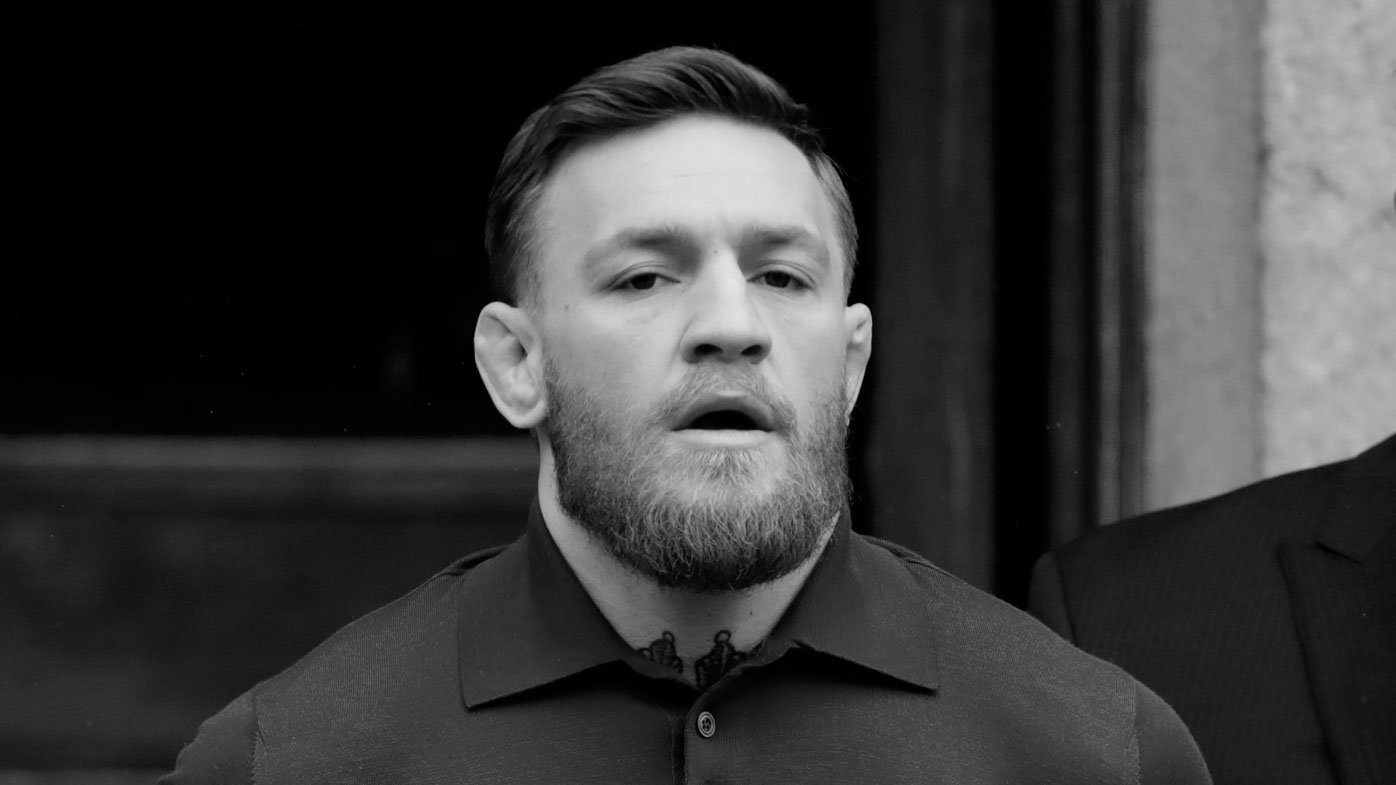

In [ ]:
img = cv2.imread('conan.jpeg')

print('проверяем размерность матрицы')
print('colored',img.shape) #проверяем размерность матрицы

# В некоторых задачах имеет смысл обрабатывать не цветное изображение, а черно-белое. 
# Например, на детекцию лиц наличие цвета мало влияет — контуры лица и так хорошо видны. 
# А вот для нейронной сети это может быть принципиальный момент — мало ли, 
# люди выглядят одинаково, а цвет кожи разный.

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #переведем нашу цветную картинку в черно-белую
print('black & white',img.shape) #проверяем размерность матрицы

# посмотреть на загруженную картинку:
from google.colab.patches import cv2_imshow
cv2_imshow(img) #показываем картинку

## Этап 4. Детекция лица

Детектор лиц у нас уже настроен, поэтому можем переходить непосредственно к детекции. Делать это будем в 2 этапа:

1.    Ищем прямоугольники, в которых находятся лица.
2.    По этим прямоугольникам предсказываем контуры и ключевые точки лица.

С помощью `detector` мы получим координаты нужного прямоугольника. Если лиц несколько, то и наборов точек будет несколько. Чтобы выбрать конкретное лицо, нужно указать индекс (в нашем случае — `ноль`).

In [35]:
face_rect = detector(img, 1)[0]
face_rect

AttributeError: ignored